# Analisi dei commenti sul Google Play 
### Con ottica rivolta verso il miglioramento del servizio e dell'usabilità
Lo scopo di questo mini-progetto è quello di andare ad analizzare i commenti del Google Play store fatti sulla pagina dell'app di **Facebook**. <br>
La scelta di analizzare i commenti direttamente dal Play Store nasce dalla definizione di Usability Inquiry, che formalmente è un *sondaggio* nel quale degli esaminatori pongono domande riguardo l'usabilità del prodotto a una popolazione di tester. <br>
Il problema principale dell'usability Inquiry è la sua applicabilità, con un servizio com Facebook diventa impensabile andare ad eseguire un sondaggio accurato alla popolazione per i seguenti motivi:
+ Popolazione troppo ampia ed eterogenea
+ Scarsa tendenza della popolazione di Facebook ad eseguire sondaggi
+ Spese molto elevate per raggiungere tutta la popolazione interessata (noi non siamo Facebook, dovremmo pagare per sponsorizzare il sondaggio)<br>

E' stato individuato quindi il principale luogo dove gli utenti si *lamentano*, cioè il Play Store.<br>
La tendenza degli utenti è quella di evidenziare problematiche, nella maggioranza i commenti sono critiche (più o meno costruttive)
***

## Scraping dei commenti dal Play Store
E' stato scelto di usare Python con la libreria requests per lo scraping dei commenti.<br>
La richiesta è stata forgiata manualmente usando il proxy Burp.

In [1]:
import requests
import re

def getGooglePlayReviews(page):
    headers = {
        "SID": "yANwZ3AJKyjH3S71nz2HgfOl_1VdFOgmLtl1g1BCvY0QAlvtgivx_eilmVs4BYPE8w4b2g.",
        "HSID" : "AWqhVubYdnMcSTZ9U",
        "SSID" : "Awy2l-Qi6gnmV-SPN",
        "APISID" : "wjGZiaLk1OArK0yb/AHrzTzAroxAQM7Ec5",
        "SAPISID": "2tcp1a41bgMToGg8/AbzuHanNUAHw469Gx",
        "CONSENT":"YES+IT.it+20160117-18-0",
        "_ga":"GA1.3.505160875.1474322573",
        "OGPC" : "5061821-8:"
    }

    data = {
        "reviewType": 0,
        "pageNum" :page,
        "id":"com.facebook.katana",
        "reviewSortOrder":4,
        "xhr": 1,
        "token": "WZoOkfYty7v0H9yjvbZZ1pPDe5Q%3A1486642693855",
        "hl":"it"
    }
    r = requests.post("https://play.google.com/store/getreviews?authuser=0", headers=headers, data=data)
    revs = re.findall("(review-title)(.*?)(review-link)",r.text)
    x = []
    [x.append(y) for (a,y,b) in revs]
    return x


### Unisco tutti i commenti recuperati in un unica lista
Da stabilire il numero di pagine da recuperare, ognuna contiene circa 40 commenti

In [2]:
s = []
[[s.append(x) for x in getGooglePlayReviews(i)] for i in range(1,10)]
print "" #per cancellare l'output rumoroso del precedente comando

In [3]:
s = [x[25:-24] for x in s]

## Pulizia della lista dei commenti
Viene applicato un algoritmo di eliminazione delle stopwords molto elementare, ci appoggiamo alla libreria NLTK (Natural Language Toolkit) <br>
Per completezza dovremmo effettuare anche uno stemming ma esso andrebbe a compromettere la nostra comprensione dei risultati finali nella WordCloud.

In [4]:
from nltk.corpus import stopwords

stop = set(stopwords.words('italian'))
final_list = [" ".join([i for i in x.lower().split() if i not in stop]) for x in s]

In [5]:
def showWordCloud(wordcloud):
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

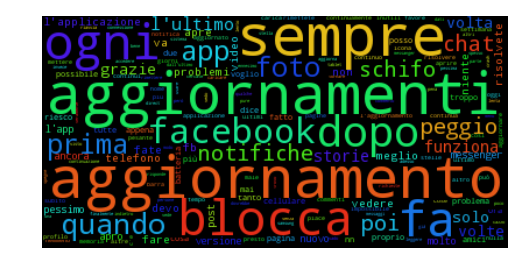

In [6]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(" ".join(final_list))
showWordCloud(wordcloud)

# Conclusioni
Com'è possibile vedere dalla WordCloud, i trend principali riguardano (ovviamente) gli ultimi aggiornamenti dell'applicazione di Facebook, i problemi che si evidenziano maggiormente sono i seguenti:
+ Poca responsività dell'applicativo, in termini mobile.
+ Frequenti Crash

<br>
Questo accade per la scarsa fluidità dell'interfaccia dell'applicativo e dell'eccessiva complessità del core. <br>
La responsività nel mobile è un concetto molto importante, le linee guida suggeriscono che tutti i task più onerosi non debbano girare nel main UI thread, ma essere delegati a task asincroni in modo da garantire una responsività continua dell'interfaccia anche con grandi carichi di lavoro.